# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df=pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df_na=df.isna()
df_na.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df['Income']=df['Income'].fillna(df['Income'].median())
#use median instead of mean when facing outlier values

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### 5. Drop the columns which you think redundant for the analysis 

In [8]:
df=df.drop('ID',axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [9]:
df=df.drop('Dt_Customer',axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [10]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
df['Marital_Status']=df['Marital_Status'].replace('Married','relationship')
df['Marital_Status']=df['Marital_Status'].replace('Together','relationship')
df['Marital_Status']=df['Marital_Status'].replace('Divorced','single')
df['Marital_Status']=df['Marital_Status'].replace('Widow','single')
df['Marital_Status']=df['Marital_Status'].replace('Alone','single')
df['Marital_Status']=df['Marital_Status'].replace('YOLO','single')
df['Marital_Status']=df['Marital_Status'].replace('Absurd','single')
df['Marital_Status']=df['Marital_Status'].replace('Single','single')

In [13]:
df['Marital_Status'].value_counts()

relationship    1444
single           796
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [14]:
df['Total_Expenses']=df['MntWines']+df['MntFruits']+df['MntGoldProds']+df['MntSweetProducts']+df['MntFishProducts']+df['MntMeatProducts']

In [15]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
0,1957,Graduation,single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,422


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [16]:
df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']

In [17]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases
0,1957,Graduation,single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,1617,25
1,1954,Graduation,single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,27,6
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,776,21
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,53,8
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,422,19


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [18]:
df['Kids']=df['Kidhome']+df['Teenhome']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids
0,1957,Graduation,single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,1617,25,0
1,1954,Graduation,single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,27,6,2
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,776,21,0
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,53,8,1
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,422,19,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [19]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,1617,25,0,1
1,1954,Graduation,single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,53,8,1,0
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,422,19,1,0


### 11. Drop those columns which we have used above for obtaining new features

In [20]:
df=df.drop(['MntWines','MntFruits','MntGoldProds','MntSweetProducts','MntFishProducts','MntMeatProducts','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'],axis=1)
df=df.drop('Kidhome',axis=1)
df=df.drop('Teenhome',axis=1)
df=df.drop('AcceptedCmp1',axis=1)
df=df.drop('AcceptedCmp2',axis=1)
df=df.drop('AcceptedCmp3',axis=1)
df=df.drop('AcceptedCmp4',axis=1)
df=df.drop('AcceptedCmp5',axis=1)
df=df.drop('Response',axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [21]:
df['Age']=2023-df['Year_Birth']
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,1957,Graduation,single,58138.0,58,7,0,1617,25,0,1,66
1,1954,Graduation,single,46344.0,38,5,0,27,6,2,0,69
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0,42


In [22]:
df=df.drop('Year_Birth',axis=1)
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,single,58138.0,58,7,0,1617,25,0,1,66
1,Graduation,single,46344.0,38,5,0,27,6,2,0,69
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,42


### 13. Encode the categorical variables in the dataset

In [23]:
cate = ['Education', 'Marital_Status']
lbl_encode = LabelEncoder()

for i in cate:
    df[i] = lbl_encode.fit_transform(df[i])

### 14. Standardize the columns, so that values are in a particular range

In [24]:
df1=df.copy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [25]:
cov_matrix=np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663,  0.01375403,  0.12003272, -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [ 0.01375403,  1.00044663, -0.00468593,  0.00450972, -0.00344176,
         0.00520466,  0.01775232, -0.00671037, -0.03917598,  0.06004206,
         0.0042384 ],
       [ 0.12003272, -0.00468593,  1.00044663, -0.0040626 , -0.55003054,
        -0.02719904,  0.66507176,  0.56370172, -0.29098745,  0.28723724,
         0.16097107],
       [-0.01173369,  0.00450972, -0.0040626 ,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882, -0.00344176, -0.55003054, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252,  0.00520466, -0.02719904,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [26]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

In [27]:
eig_vals

array([3.1904976 , 0.15898427, 0.33405275, 1.2576053 , 0.57467313,
       0.70088133, 0.8148781 , 0.88268049, 1.07559424, 0.99819893,
       1.01686678])

In [28]:
eig_vectors

array([[-8.10840602e-02,  1.28350259e-02, -2.36686503e-02,
        -5.51297088e-01,  9.44079917e-02,  1.09399823e-01,
         6.91176145e-01, -2.13936354e-01,  3.53448105e-01,
         1.33251310e-01,  4.14253698e-02],
       [-1.65906490e-02, -5.37729948e-04,  2.73537172e-03,
         7.24644501e-02, -9.30748009e-03,  1.59677373e-01,
        -9.75268782e-02,  2.48019835e-01,  2.93280626e-01,
         5.20531449e-01, -7.35452612e-01],
       [-4.53903415e-01,  1.10154101e-01,  7.33770178e-01,
        -1.11579420e-01, -4.00829608e-01,  2.33759772e-01,
        -3.55280357e-02,  8.22772957e-02, -7.11591328e-02,
        -3.28890469e-02,  3.85228536e-02],
       [ 4.88801362e-03,  3.74741918e-02,  1.77808800e-02,
        -1.12911590e-01, -4.88512292e-02, -1.39140776e-01,
         2.76281232e-02, -4.78105566e-01, -6.57509247e-01,
         5.43269886e-01, -8.33737576e-02],
       [ 3.78637324e-01, -9.89967067e-02,  5.23086432e-01,
        -3.88610332e-02,  4.48301055e-01,  8.26478962e-02,
  

In [29]:
total = sum(eig_vals)
var_exp=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)

In [30]:
var_exp

[28.991575143457847,
 11.427671513170516,
 9.773764190197188,
 9.240116561433672,
 9.070484567401635,
 8.020785766248595,
 7.404675574847669,
 6.368803961509471,
 5.221968893580303,
 3.0354874842214796,
 1.4446663439316347]

In [31]:
cum_var_exp

array([ 28.99157514,  40.41924666,  50.19301085,  59.43312741,
        68.50361198,  76.52439774,  83.92907332,  90.29787728,
        95.51984617,  98.55533366, 100.        ])

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [32]:
pca = PCA(n_components=8)
pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.957055,-0.081739,-0.344512,1.193882,-0.696833,-0.299017,-1.145161,-0.357545
1,-1.512469,1.000600,-0.367141,1.007044,-0.444544,1.371957,-0.724419,-0.346326
2,1.314744,-0.299369,0.296387,-0.765120,0.732714,0.984409,0.025308,0.058777
3,-1.754887,-1.139787,-0.254573,-0.825218,0.579116,0.221944,0.562441,0.239502
4,0.063732,0.571385,0.902276,-0.757431,-0.795115,-1.241512,1.325684,0.898414


In [33]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
cluster_errors=[]
cluster_range=range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

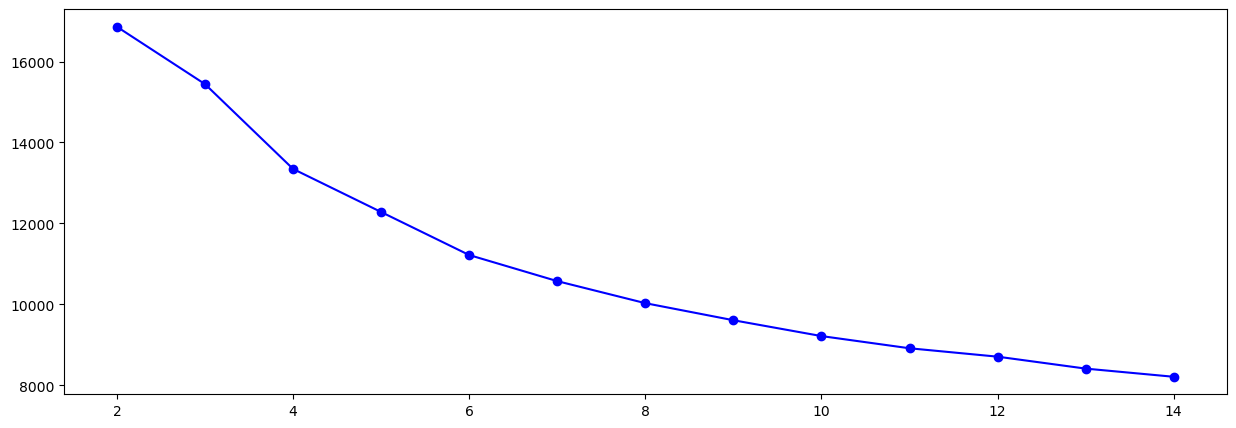

In [34]:
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [35]:
kmeans=KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [36]:
label=pd.DataFrame(kmeans.labels_,columns=['Label'])

In [37]:
kmeans_df=pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.957055,-0.081739,-0.344512,1.193882,-0.696833,-0.299017,-1.145161,-0.357545,0
1,-1.512469,1.000600,-0.367141,1.007044,-0.444544,1.371957,-0.724419,-0.346326,1
2,1.314744,-0.299369,0.296387,-0.765120,0.732714,0.984409,0.025308,0.058777,0
3,-1.754887,-1.139787,-0.254573,-0.825218,0.579116,0.221944,0.562441,0.239502,1
4,0.063732,0.571385,0.902276,-0.757431,-0.795115,-1.241512,1.325684,0.898414,2


In [38]:
kmeans_df['Label'].value_counts()

1    1023
2     704
0     513
Name: Label, dtype: int64

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

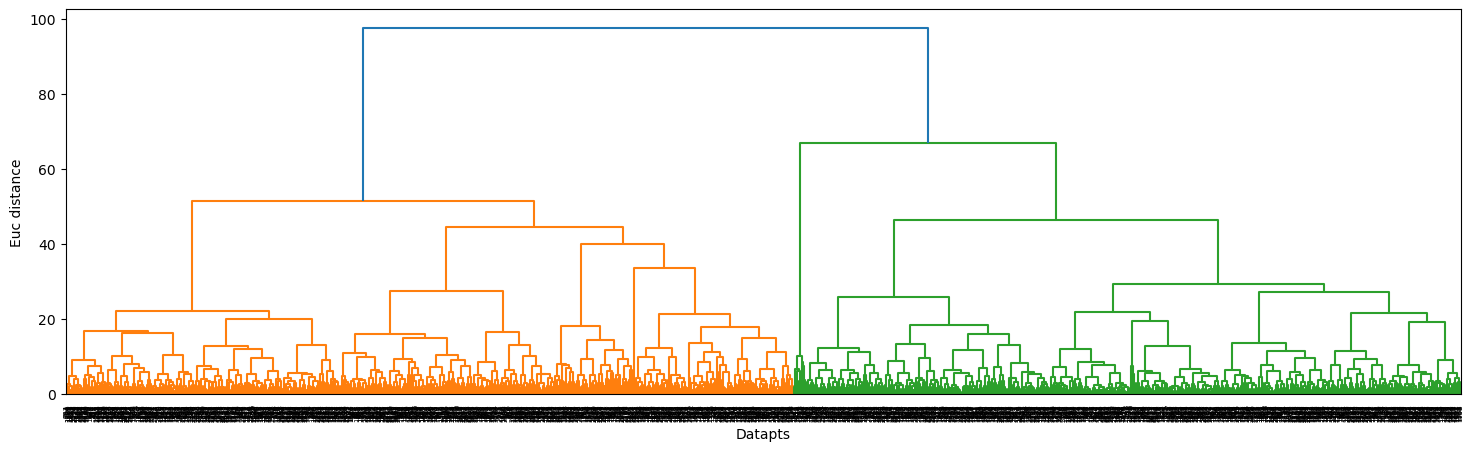

In [42]:
plt.figure(figsize=[18,5])
merg=linkage(scaled_features,method='ward')
dendrogram(merg)
plt.xlabel('Datapts')
plt.ylabel('Euc distance')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [46]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.19084804869286545
3 0.1985995824170426
4 0.11246117002822419
5 0.11424998800535785
6 0.13182229011122568
7 0.13957493415194128
8 0.139075650529795
9 0.1133755030484244
10 0.11192620306577665
11 0.10382539581016359
12 0.1089357352582103
13 0.10234785589805018
14 0.09550766042020287


In [47]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [48]:
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [49]:
df_hier=dfc.join(df_label1)
df_hier.head()

NameError: name 'dfc' is not defined

### Visualization and Interpretation of results

-----
## Happy Learning
-----